<img src='https://github.com/mbdfmad/fmad2223/raw/main/fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
2022-10-17 Exam.
<a class="tocSkip">   
</h1>  

<h1 style='font-family: Optima;color:red'>
NOMBRE Y APELLIDO: Marta Simón Pinacho 
</h1>    

# Instructions <a class="tocSkip">

+ The exam consists of a short Moodle quiz and a data analysis exercise described below in this notebook. You can access the quiz in this link:  
    [https://sifo.comillas.edu/mod/quiz/view.php?id=2579775&forceview=1](https://sifo.comillas.edu/mod/quiz/view.php?id=2579775&forceview=1)  

+ The exam quiz accounts for a 20% of the exam grade and the data analysis accounts for the remaining 80%. We recommend that you don't use more than 20-25 minutes for the quiz!

+ All the questions in the exam have the same value.
    
+ During the exam you can use code fragments from the lectures, check your notes, go online to read documentation, etc. The only requirement is that the exam reflects your individual work.  
    **Please take this as a warning: getting external help during the exam will not be tolerated and will have academic consequences beyond this exam.** 
    
+ Use this notebook to answer the exam question. When you are done simply email the notebook with your answers to 
<a href="mailto:fsansegundo@comillas.edu?subject=FMAD exam submission">fsansegundo@comillas.edu</a>
    

# Introduction to the Data Set <a class="tocSkip">
    
+ For this exam we will be using a data set containing information about crime rates in different communities of the US in 1990. This data set has been adapted for the exam, starting from a classical example frequently used for Machine Learning models. You can find more information about this data set and the meaning of the variable names in the following link (look for the *Attribute Information* section):

  [https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime)  

+ You can download the data set using this link:
  
    [crimes_exam_data.csv](https://gist.githubusercontent.com/fsansegundo/513d3468f832bf9c928bdb010230447b/raw/580a33130ad481aa9ec68f07225e7c8e19a5abbe/crimes_exam_data.csv)

# Preliminaries <a class="tocSkip">

+ We add here the import commands for the common data science libraries so you don't have to waste time importing them. **But we warned that you may need additional imports for some questions!**

In [1]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
sns.set()

+ Read the data file into a pandas `DataFrame` **called `crimes`**, which we will use for the rest of the exam.

In [2]:
crimes = pd.read_csv("crimes_exam_data.csv")
crimes.head()

,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.0,75122,...,0.0,0.00,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,100.0,47917,...,0.0,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,100.0,35669,...,8.3,16.60,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51
3,Gloversvillecity,NY,16656,2.40,12.55,25.20,12.19,17.57,0.0,20580,...,0.0,57.86,57.86,190.93,1301.78,4142.56,271.93,NaN,306.64,NaN
4,Bemidjicity,MN,11245,2.76,24.46,40.53,28.69,12.65,0.0,17390,...,0.0,NaN,32.04,112.14,728.93,8490.87,728.93,40.05,NaN,9988.79


# Questions <a class="tocSkip">

### Question 1:  <a class="tocSkip">

+ How many rows are there in the table? 
+ How many variables?    
+ Which variable has the most missing data? 
    
After answering this question **make sure to remove all rows containing missing data** from the table before proceeding to the next question.

**Answer:**

In [3]:
print(f"El numero de observaciones que hay en la tabla es de (filas, columnas): {crimes.shape}")

El numero de observaciones que hay en la tabla es de (filas, columnas): (2215, 23)


In [4]:
print(f"Las columnas(variables) que componen la tabla son {crimes.columns.size}:\n{crimes.columns}")

Las columnas(variables) que componen la tabla son 23:
Index(['communityname', 'state', 'population', 'householdsize', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'pctUrban', 'medIncome',
       'PctPopUnderPov', 'PopDens', 'LemasPctOfficDrugUn', 'murdPerPop',
       'rapesPerPop', 'robbbPerPop', 'assaultPerPop', 'burglPerPop',
       'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object')


In [5]:
# Para revisar los valores nulos, en primer lugar comprobamos si nuestro dataset tiene alguno:
Nan = crimes.isnull().values.any()
print(f"¿Hay algún valor nulo?: {Nan}")

¿Hay algún valor nulo?: True


In [6]:
por_columna=crimes.isna().sum().sort_values()
print(f"El numero de valores nulos que hay en cada columna es de:\n{por_columna}")

El numero de valores nulos que hay en cada columna es de:
communityname            0
murdPerPop               0
LemasPctOfficDrugUn      0
PctPopUnderPov           0
medIncome                0
pctUrban                 0
agePct65up               0
PopDens                  0
agePct12t29              0
agePct12t21              0
householdsize            0
population               0
state                    0
agePct16t24              0
robbbPerPop              1
burglPerPop              3
larcPerPop               3
autoTheftPerPop          3
assaultPerPop           13
arsonsPerPop            91
nonViolPerPop           97
rapesPerPop            208
ViolentCrimesPerPop    221
dtype: int64


Ordenando el conteo de valores nulos de menor a mayor, podemos ver que la variable que más valores nulos tiene es `ViolentCrimesPerPop`

In [7]:
# Una vez localizados los valores nulos, procedemos a eliminarlos
crimes.dropna(inplace=True)
print("Valores nulos eliminados")
np.any(crimes.isna())

Valores nulos eliminados


False

### Question 2:  <a class="tocSkip">

+ Show the variables in the data set and their types. If there are categorical variables identify them and convert them to that type. 
    
**Answer:**

In [8]:
# Observamos los tipos de las variables
crimes.dtypes

communityname           object
state                   object
population               int64
householdsize          float64
agePct12t21            float64
agePct12t29            float64
agePct16t24            float64
agePct65up             float64
pctUrban               float64
medIncome                int64
PctPopUnderPov         float64
PopDens                float64
LemasPctOfficDrugUn    float64
murdPerPop             float64
rapesPerPop            float64
robbbPerPop            float64
assaultPerPop          float64
burglPerPop            float64
larcPerPop             float64
autoTheftPerPop        float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
dtype: object

In [9]:
# Las variables de tipo object son factores
crimes.columns[crimes.dtypes == object]

Index(['communityname', 'state'], dtype='object')

In [10]:
# el resto de variables son numéricas
crimes.columns[crimes.dtypes != 'object']

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'pctUrban', 'medIncome', 'PctPopUnderPov',
       'PopDens', 'LemasPctOfficDrugUn', 'murdPerPop', 'rapesPerPop',
       'robbbPerPop', 'assaultPerPop', 'burglPerPop', 'larcPerPop',
       'autoTheftPerPop', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object')

In [11]:
# Para convertir las variables object (facctores) a categóricas, hacemos lo siguiente
crimes_objects = crimes.columns[crimes.dtypes == 'object']
crimes[crimes_objects] = crimes[crimes_objects].astype('category')
# comprobamos que se han convertido a categoría correctamente y los mostramos
crimes_cat = crimes.columns[crimes.dtypes == 'category']
crimes.loc[:,crimes_cat]

,communityname,state
0,BerkeleyHeightstownship,NJ
1,Marpletownship,PA
2,Tigardcity,OR
5,Springfieldcity,MO
6,Norwoodtown,MA
...,...,...
2210,Mercedcity,CA
2211,Pinevillecity,LA
2212,Yucaipacity,CA
2213,Beevillecity,TX


### Question 3:  <a class="tocSkip">

+ For the variables 
 ```    
 'population', 'householdsize', 'pctUrban', 'medIncome', 'PctPopUnderPov', 'PopDens'   
 ```
 (copy and paste them!) do a basic numeric summary that contains their mean, median, quartiles, sd and range (min and max).  
 *Hint:* you can do this in a single table for all those variables. 

+ Make a *pairplot* for all these variables.    
    
**Answer:**    

In [12]:
print("Podemos ver la información más relevante de las variables indicadas en la siguiente tabla:")
crimes.loc[:,['population', 'householdsize', 'pctUrban', 'medIncome', 'PctPopUnderPov', 'PopDens']].describe()

Podemos ver la información más relevante de las variables indicadas en la siguiente tabla:


,population,householdsize,pctUrban,medIncome,PctPopUnderPov,PopDens
count,1.902000e+03,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,5.248226e+04,2.712077,69.960931,33947.199790,11.674858,2803.496793
std,2.060649e+05,0.347385,44.270759,13497.931524,8.477675,2944.885801
min,1.000500e+04,1.600000,0.000000,12908.000000,0.640000,10.000000
25%,1.432350e+04,2.500000,0.000000,23702.750000,4.630000,1175.925000
50%,2.268100e+04,2.660000,100.000000,31268.000000,9.425000,2000.700000
75%,4.324975e+04,2.860000,100.000000,41484.750000,17.040000,3277.375000
max,7.322564e+06,5.280000,100.000000,123625.000000,48.820000,44229.900000


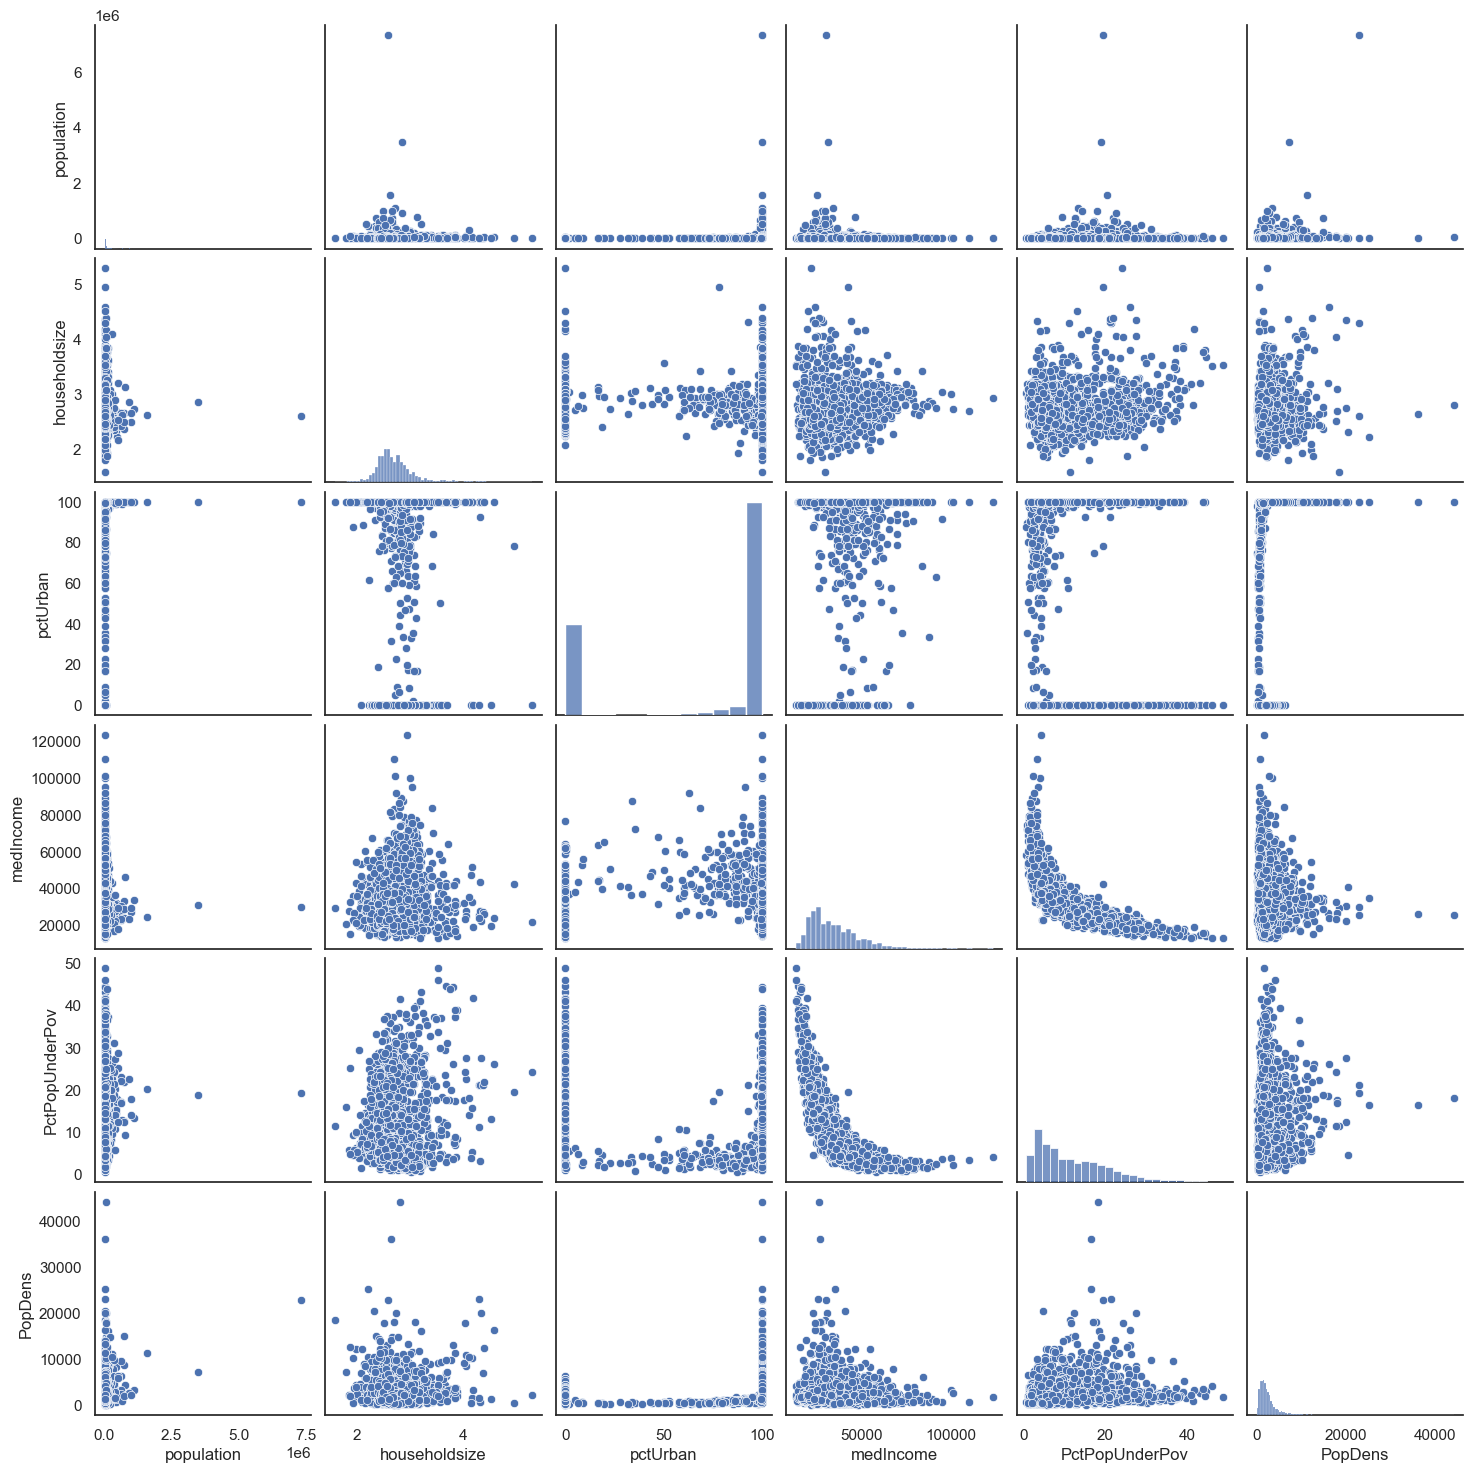

In [13]:
# Una vez calculados los valores más relevantes de las variables, hacemos un pairplot para compararlas entre ellas
sns.set_style("white")
sns.pairplot(crimes.loc[:,['population', 'householdsize', 'pctUrban', 'medIncome', 'PctPopUnderPov', 'PopDens']])
plt.show()

### Question 4:  <a class="tocSkip">

+ Create a new column called `houseSize` dividing (binning) `householdSize` in 8 levels, from 1 to 5.5 in increments of 0.5:  
    $\qquad\qquad\qquad\qquad\qquad (1, 1.5],\quad (1.5, 2],\,\ldots\,, (4.5, 5],\quad (5, 5.5]$

+ Make a *frequencies table* for `houseSize` containing the absolute and relative frequencies (in the same table). 
    
+ Looking at the pair plot observe the distribution of `pctUrban`. Find the number of communities that are *not purely urban but also not purely rural*. That is, find the number of rows of the table where  `pctUrban` is *simultaneously* bigger than 10 and smaller than 90. **Discard these rows from the table, but keep the name `crimes` for the resulting table.**
    
+ **After doing that** create another column called `isUrban` with value `True` if `pctUrban` $\geq 90$ and value `False` otherwise. Create a relative frequency table for `isUrban`.
    


**Answer:**    

In [14]:
# Creamos los intervalos para dividir el dataframe según el tamaño de las casas
# Para generar contenedores ("rangos") controlados, podemos especificarlo de la siguiente forma
house_nodes = np.arange(1, 5.5, 0.5) # Con esto, generamos un array de numeros ordenados del 1 al 5.5, con saltos de 0.5 en 0.5 

print(f"Intervalos en los que se dividirá el df: {house_nodes}")

# Añadimos la nueva columna calculada al dataframe
crimes['houseSize'] = pd.cut(crimes.householdsize, bins=house_nodes, ordered=True)# Ahora le indicamos en el param bins los rangos de los contenedores que debe usar
#Mostramos el df para comprobar que se ha añadido la columna nueva correctamente
crimes.head(10)

Intervalos en los que se dividirá el df: [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,houseSize
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.0,75122,...,0.00,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,"(3.0, 3.5]"
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,100.0,47917,...,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95,"(2.5, 3.0]"
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,100.0,35669,...,16.60,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51,"(2.0, 2.5]"
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,100.0,21577,...,50.98,90.05,297.29,1386.46,5091.64,300.60,88.72,442.95,6867.42,"(2.0, 2.5]"
6,Norwoodtown,MA,28700,2.60,11.17,27.41,12.76,14.42,100.0,42805,...,13.53,30.44,182.66,372.09,974.19,487.10,57.50,226.63,1890.88,"(2.5, 3.0]"
7,Andersoncity,IN,59459,2.45,15.31,27.93,14.78,14.60,100.0,23221,...,55.79,160.80,210.02,997.60,3691.79,205.10,14.77,439.73,4909.26,"(2.0, 2.5]"
8,Fargocity,ND,74111,2.46,16.64,35.16,20.33,8.58,100.0,25326,...,43.87,20.05,51.39,532.66,3946.71,258.18,10.03,115.31,4747.58,"(2.0, 2.5]"
9,Wacocity,TX,103590,2.62,19.88,34.55,21.62,13.12,100.0,17852,...,130.69,419.89,966.77,2221.81,5673.63,991.80,16.68,1544.24,8903.93,"(2.5, 3.0]"
10,Shermancity,TX,31601,2.54,15.73,28.57,15.16,14.26,100.0,24763,...,90.25,220.96,407.69,1456.49,5654.80,469.94,18.67,722.02,7599.90,"(2.5, 3.0]"
11,SanPablocity,CA,25158,2.89,13.65,28.82,13.23,9.44,100.0,25479,...,77.73,1143.81,1340.00,1769.39,5404.40,1591.71,74.03,2605.96,8839.53,"(2.5, 3.0]"


In [15]:
# generamos la tabla de frecuencias absolutas de la variable
Abs_Freqs = crimes.houseSize.value_counts()
Abs_Freqs

(2.5, 3.0]    1134
(2.0, 2.5]     482
(3.0, 3.5]     209
(3.5, 4.0]      44
(4.0, 4.5]      17
(1.5, 2.0]      12
(4.5, 5.0]       3
(1.0, 1.5]       0
Name: houseSize, dtype: int64

In [16]:
# generamos la tabla de frecuencias relativas de la variable
Rel_Freqs = crimes.houseSize.value_counts(normalize = True)
Rel_Freqs

(2.5, 3.0]    0.596528
(2.0, 2.5]    0.253551
(3.0, 3.5]    0.109942
(3.5, 4.0]    0.023146
(4.0, 4.5]    0.008943
(1.5, 2.0]    0.006312
(4.5, 5.0]    0.001578
(1.0, 1.5]    0.000000
Name: houseSize, dtype: float64

In [17]:
# Localizamos los valores de pctUrban mayores que 10 y menores que 90
row_index = crimes[(crimes.pctUrban > 10) & (crimes.pctUrban < 90)].index
# Eliminamos estas filas del dataframe
crimes.drop(index = row_index, inplace = True)
# una vez eliminadas las filas, comprobamos que ya no existen dichos valores
row_index = crimes[(crimes.pctUrban > 10) & (crimes.pctUrban < 90)].index
row_index.any()

False

In [18]:
# Creamos la nueva columna Is_Urban y generamos su tabla de frecuencias
is_Urban = crimes.pctUrban >= 90
crimes['is_Urban'] = is_Urban
crimes

,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,houseSize,is_Urban
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.00,75122,...,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,"(3.0, 3.5]",True
1,Marpletownship,PA,23123,2.82,11.01,21.30,10.48,17.18,100.00,47917,...,21.26,102.05,242.37,1598.78,110.55,4.25,127.56,1955.95,"(2.5, 3.0]",True
2,Tigardcity,OR,29344,2.43,11.36,25.88,11.01,10.28,100.00,35669,...,154.95,38.74,758.14,4972.19,376.30,60.87,218.59,6167.51,"(2.0, 2.5]",True
5,Springfieldcity,MO,140494,2.45,18.09,32.89,20.04,13.26,100.00,21577,...,90.05,297.29,1386.46,5091.64,300.60,88.72,442.95,6867.42,"(2.0, 2.5]",True
6,Norwoodtown,MA,28700,2.60,11.17,27.41,12.76,14.42,100.00,42805,...,30.44,182.66,372.09,974.19,487.10,57.50,226.63,1890.88,"(2.5, 3.0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,56216,3.07,15.46,30.16,14.34,8.08,100.00,24727,...,199.50,280.29,2268.72,4225.82,806.25,56.06,545.75,7356.84,"(3.0, 3.5]",True
2211,Pinevillecity,LA,12251,2.68,17.36,31.23,16.97,12.57,100.00,20321,...,8.27,82.73,860.43,4748.90,198.56,16.55,124.10,5824.44,"(2.5, 3.0]",True
2212,Yucaipacity,CA,32824,2.46,11.81,20.96,9.53,20.73,100.00,27182,...,65.32,261.29,1709.26,2435.97,487.19,21.77,353.83,4654.20,"(2.0, 2.5]",True
2213,Beevillecity,TX,13547,2.89,17.16,30.01,14.73,10.42,0.00,19899,...,54.98,620.48,1508.01,3722.90,102.10,7.85,691.17,5340.87,"(2.5, 3.0]",False


In [19]:
# Creamos la tabla de frecuencias relativas para la nueva variable is_Urban
crimes.is_Urban.value_counts(normalize = True)

True     0.701299
False    0.298701
Name: is_Urban, dtype: float64

### Question 5:  <a class="tocSkip">

    
+ Make a plot showing (in the same plot) a histogram and density curve for `householdSize`. For the histogram make sure to use the same bins that you used for creating `houseSize`
    
+ Make a boxplot of `medIncome`. How many outliers are there? What community corresponds to the first (smallest) and last outliers (use the `comunityname` variable to find out their names).  

**Answer:**

In [20]:
# Pintamos en la misma gráfica el histograma y curva de densidad de la variable
# KDE pinta la linea de densidad (sin ello solo pinta el histograma)
# data = Estructura/datos de entrada
# x, y = vectores o claves que especifican los ejes
# bins para indicarle que lo divida en los contenedores que hemos generado anteriormente
dens_plot = sns.histplot(data = crimes, x = 'householdsize', kde=True, bins=house_nodes)
# Editamos el color y grosor de la curva de densidad
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

In [21]:
# Creamos un boxplot de la variable medIncome para localizar los outliers
getPlot = crimes.boxplot(column='medIncome', figsize=(6, 8))

In [22]:
# Contamos el numero de outliers que hay en esta variable
# Para calcular los valores atípicos:
# Calculo de los valores atípicos --> Menores que el primer cuartil - 1,5*rango intercuartílico, mayores que el tercer cuartil +1,5*rango_intercuartíloco
# Calculamos el rango intercuartílico
medIncome_iqr = stats.iqr(crimes.medIncome)
print(f"Rango intercuartílico: {medIncome_iqr}")

# Para localizar el primer y tercer cuartil.
medIncome_q1, medIncome_q3 = np.quantile(crimes.medIncome, [0.25, 0.75])

# Limites de los valores atípicos
cut_low = medIncome_q1 - 1.5 * medIncome_iqr
cut_high = medIncome_q3 + 1.5 * medIncome_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

# Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
medIncome_outliers = crimes.loc[(crimes.medIncome < cut_low) | (crimes.medIncome > cut_high)]

print("El numero de outliers de la variable medIncome es: ", len(medIncome_outliers))

medIncome_outliers


Rango intercuartílico: 16617.0
Lower and upper outlier limits: -1656.0 ,  64812.0
El numero de outliers de la variable medIncome es:  42


,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,houseSize,is_Urban
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.00,75122,...,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,"(3.0, 3.5]",True
156,Brentwoodcity,TN,16392,3.11,17.02,22.02,10.85,5.52,100.00,70287,...,9.27,13.90,393.92,1839.84,101.96,0.00,64.88,2335.71,"(3.0, 3.5]",True
192,Colleyvillecity,TX,12724,3.11,15.97,21.16,10.79,4.11,100.00,77530,...,5.29,21.17,164.04,1211.77,42.33,5.29,31.75,1423.43,"(3.0, 3.5]",True
217,Bernardstownship,NJ,17199,2.71,10.10,20.83,8.73,10.59,90.80,70000,...,0.00,75.72,248.80,919.47,48.68,0.00,75.72,1216.94,"(2.5, 3.0]",True
252,Westfieldtown,NJ,28870,2.81,12.02,21.73,10.15,11.98,100.00,66760,...,30.52,50.86,328.90,1508.88,328.90,3.39,88.16,2170.08,"(2.5, 3.0]",True
317,Ramseyborough,NJ,13228,2.84,13.07,24.25,11.44,8.54,100.00,65590,...,20.56,150.81,322.18,2173.02,301.62,0.00,185.08,2796.82,"(2.5, 3.0]",True
334,AgouraHillscity,CA,20390,3.08,15.82,24.89,11.47,3.61,100.00,70919,...,39.23,321.68,568.83,1090.58,364.83,7.85,368.76,2032.09,"(3.0, 3.5]",True
432,Chesterfieldcity,MO,37991,2.90,14.99,23.36,11.37,7.82,99.59,66930,...,29.84,67.14,440.16,1981.95,74.60,14.92,106.93,2511.63,"(2.5, 3.0]",True
437,Winchestertown,MA,20267,2.78,11.31,22.26,10.57,13.26,100.00,65994,...,4.76,38.08,299.84,894.77,185.62,0.00,52.35,1380.23,"(2.5, 3.0]",True
441,ParadiseValleytown,AZ,11671,2.70,13.63,18.70,10.04,13.47,100.00,110550,...,49.06,84.11,2768.63,1184.55,294.39,0.00,140.18,4247.56,"(2.5, 3.0]",True


In [23]:
# Localizamos el menor y mayor outlier
cn_min = crimes[crimes.medIncome == medIncome_outliers.medIncome.min()].communityname
cn_max = crimes[crimes.medIncome == medIncome_outliers.medIncome.max()].communityname
print(f"La comunidad con un valor de medIncome mayor (dentro de los outliers es): {cn_max[2105]}")
print(f"La comunidad con un valor de medIncome menor (dentro de los outliers es): {cn_min[317]}")

La comunidad con un valor de medIncome mayor (dentro de los outliers es): Hillsboroughtown
La comunidad con un valor de medIncome menor (dentro de los outliers es): Ramseyborough


### Question 6:  <a class="tocSkip">
    
    
+ Find the total population for each state, adding up the observations in the table corresponding to that state. 

+ Create a new data set containing only the data corresponding to the five most populated states. Call that new data set `crimesTop5`.

<hr style='border: 1px dashed blue'>
    
**Before going on:** make sure that you create a list called `top5names` with the names of the top 5 most populated states. For example, this could be 
```
top5Names = ['DC', 'FL', 'PA', 'TX', 'FL']    
```
(but it is not! you have to find the real one)  Then, when you have created the list, run this code to remove the levels for the non top 5 states:
```    
top5_cat = pd.CategoricalDtype(top5Names)
crimesTop5 = crimesTop5.copy()
crimesTop5['state'] = crimesTop5.state.astype(top5_cat)    
```    
<hr style='border: 1px dashed blue'>    
    
+ After doing that, and using the data in `crimesTop5`, find the median by state of `ViolentCrimesPerPop`. Also choose a good plot to visualize the (possible) relation between these two variables.  
 **Optional:** Make a graphic judgment: does this relation depend on the `isUrban` variable?

**Answer:**

In [24]:
# Buscamos la poblacion de cada estado, para ello tenemos que sumar el valor de todas las muestras de cada estado (hay varias communitynames en un estado)
# Ordenamos los estados de mayor a menor y nos quedamos con lo 5 primeros
top5Names = np.array(crimes.groupby(["state"]).population.sum().sort_values(ascending=False)[:5].index)
top5Names

array(['CA', 'NY', 'TX', 'NJ', 'FL'], dtype=object)

In [25]:
# Creamos el nuevo dataframe unicamente con los datos correspondientes a los 5 estados más poblados
crimesTop5 = pd.DataFrame(crimes[crimes.state.isin(top5Names)])
crimesTop5

,communityname,state,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,...,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,houseSize,is_Urban
0,BerkeleyHeightstownship,NJ,11980,3.10,12.47,21.44,10.93,11.33,100.00,75122,...,8.20,32.81,114.85,1132.08,131.26,16.41,41.02,1394.59,"(3.0, 3.5]",True
9,Wacocity,TX,103590,2.62,19.88,34.55,21.62,13.12,100.00,17852,...,419.89,966.77,2221.81,5673.63,991.80,16.68,1544.24,8903.93,"(2.5, 3.0]",True
10,Shermancity,TX,31601,2.54,15.73,28.57,15.16,14.26,100.00,24763,...,220.96,407.69,1456.49,5654.80,469.94,18.67,722.02,7599.90,"(2.5, 3.0]",True
11,SanPablocity,CA,25158,2.89,13.65,28.82,13.23,9.44,100.00,25479,...,1143.81,1340.00,1769.39,5404.40,1591.71,74.03,2605.96,8839.53,"(2.5, 3.0]",True
17,Glendalecity,CA,180038,2.62,12.04,26.68,12.37,11.54,100.00,34372,...,197.91,154.42,889.74,2509.23,806.68,40.70,374.07,4246.34,"(2.5, 3.0]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,Manvilleborough,NJ,10567,2.57,10.42,24.90,11.10,15.33,100.00,37664,...,28.47,104.39,170.83,1717.76,104.39,0.00,132.87,1992.98,"(2.5, 3.0]",True
2210,Mercedcity,CA,56216,3.07,15.46,30.16,14.34,8.08,100.00,24727,...,199.50,280.29,2268.72,4225.82,806.25,56.06,545.75,7356.84,"(3.0, 3.5]",True
2212,Yucaipacity,CA,32824,2.46,11.81,20.96,9.53,20.73,100.00,27182,...,65.32,261.29,1709.26,2435.97,487.19,21.77,353.83,4654.20,"(2.0, 2.5]",True
2213,Beevillecity,TX,13547,2.89,17.16,30.01,14.73,10.42,0.00,19899,...,54.98,620.48,1508.01,3722.90,102.10,7.85,691.17,5340.87,"(2.5, 3.0]",False


In [26]:
# Ejecutamos estos comandos, tal y como indica el enunciado
top5_cat = pd.CategoricalDtype(top5Names)
crimesTop5 = crimesTop5.copy()
crimesTop5['state'] = crimesTop5.state.astype(top5_cat)    

In [27]:
# calculamos la media por estado del nuevo df
mean_ViolentCrimesPerPop = crimesTop5.groupby(['state']).ViolentCrimesPerPop.mean()

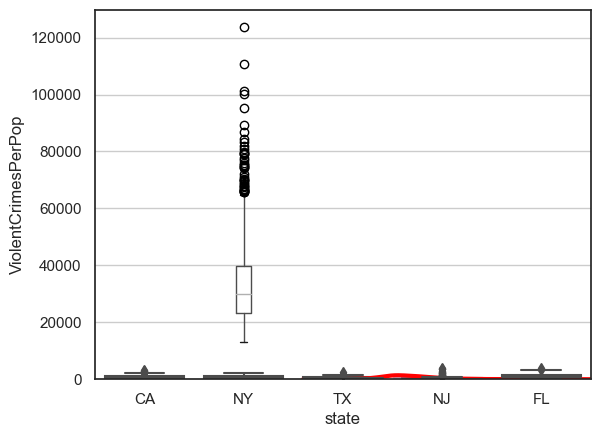

In [28]:
# Vamos a hacer un gráfico para comparar el factor estado con la media de la variable ViolentCrimesPerPop, para ver si tienen alguna relacion
# Para comparar factores con variables numericas hacemos un boxplot
# con el parámetro order podemos especificar el orden en el que queremos pintarlo
sns.boxplot(x='state', y='ViolentCrimesPerPop', data=crimesTop5)
plt.show()

### Question 7:  <a class="tocSkip">

+ If we randomly pick a community whose `PopDens` is *below-average* (lower than the mean `PopDens` for all communities), find the probability `p` that  its `robbbPerPop` value is less than 30. 
    
+ Using the previous result: suppose that we take a random sample (with replacement) of 15  *below-average* `PopDens` communities. What is the **theoretical** probability that **5 or more** of them will have a `robbbPerPop` value less than 30. 

+ Check that result using a simulation where you take $N = 10000$ samples, each of them with 15 *below-average* `PopDens` communities and find the relative frequency of the event:  5 or more of them have a `robbbPerPop` value less than 30.    
    
**Answer:**

In [29]:
# P(robbbPerPop < 30 | PopDens< media)
# escogemos al azar una comunidad cuyo PopDens sea menor que la media
# empleados[empleados.JobSatisfaction == 'Very_High'].MaritalStatus.value_counts(normalize = True)
aux = crimes[crimes.PopDens < crimes.PopDens.mean()].robbbPerPop.value_counts(normalize = True).sort_index()
aux

0.00       0.043911
2.78       0.000829
2.99       0.000829
3.33       0.000829
3.64       0.000829
             ...   
1022.83    0.000829
1088.77    0.000829
1095.18    0.000829
1105.38    0.000829
1495.04    0.000829
Name: robbbPerPop, Length: 1130, dtype: float64

### Question 8:  <a class="tocSkip">

+ Using the whole `crimes` data set. Find the two states with the lowest and highest median values for `PctPopUnderPov`. Then find the two 95% confidence intervals for the means of `assaultPerPop` for each of these two states. What is your conclussion? 
    
**Answer:**

In [30]:
mean_PctPopUnderPov_bystate = crimes.groupby(['state']).PctPopUnderPov.mean().sort_values()
mean_PctPopUnderPov_bystate

state
CT     5.960889
MA     6.172410
NJ     6.288087
MN     6.505000
NH     6.870625
AK     7.683333
PA     9.071481
NV     9.142500
WI     9.386250
RI     9.475625
OH    10.783300
CA    10.789676
WY    11.011429
UT    11.156667
MO    11.239048
IN    11.353125
ME    11.517333
DE    12.450000
FL    12.471444
ND    12.553750
CO    12.586800
IA    13.126667
VA    13.131875
OR    13.379032
WA    13.938462
TN    14.850000
AZ    15.036500
SD    15.562500
SC    15.663571
MD    15.815556
NY    15.833793
OK    16.178056
KY    16.461923
DC    16.870000
NC    17.159130
WV    17.704286
TX    17.771316
AR    18.780800
ID    18.972857
AL    19.870625
GA    19.934324
NM    22.639000
MS    23.816842
LA    26.339474
Name: PctPopUnderPov, dtype: float64

Podemos ver que el estado con mayor mediana de la variable PctPopUnderPov es `LA` y el de menor es `IL` 

In [31]:
# Ahora buscamos el intervalo de confianza al 95% para la media de assaultPerPop de cada estado
# Para LA
crimes_LA = crimes[crimes.state == 'LA']

n = len(crimes_LA)
print("El numero de muestras de crimenes en LA es:" ,n)
barX = crimes_LA.assaultPerPop.mean()
print("La media muestral es de: ", barX)
s = crimes_LA.assaultPerPop.std()
print("La varianza es de: ", s)

sl = 0.95
alpha = 1 - sl

# Muestra grande, calculamos el punto crítico con la normal
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

# Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("El intervalo de confianza para la estacion de casa de campo es ", conf_int)
print("Redondeamos a 4 digitos: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

El numero de muestras de crimenes en LA es: 19
La media muestral es de:  984.8842105263158
La varianza es de:  733.4753059640552
El intervalo de confianza para la estacion de casa de campo es  [ 655.07955071 1314.68887034]
Redondeamos a 4 digitos: [655.1, 1.315e+03]


In [32]:
# Para IL
crimes_IL = crimes[crimes.state == 'IL']

n = len(crimes_IL)
print("El numero de muestras de crimenes en IL es:" ,n)
barX = crimes_IL.assaultPerPop.mean()
print("La media muestral es de: ", barX)
s = crimes_IL.assaultPerPop.std()
print("La varianza es de: ", s)

sl = 0.95
alpha = 1 - sl

# Muestra grande, calculamos el punto crítico con la normal
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

# Formula de los intervalos de confianza (x barra +- crit_point*var/raiz de n)
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("El intervalo de confianza para la estacion de casa de campo es ", conf_int)
print("Redondeamos a 4 digitos: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

El numero de muestras de crimenes en IL es: 0
La media muestral es de:  nan
La varianza es de:  nan
El intervalo de confianza para la estacion de casa de campo es  [nan nan]
Redondeamos a 4 digitos: [nan, nan]


Podemos ver que para la variable `assaultPerPop` en los crimenes de LA tenemos valores mucho más dispersos, puesto que su intervalo de confianza es mucho mayor.

Sin embargo, para la misma variable en IL, el intervalo de confianza es más reducido.

### Question 9:  <a class="tocSkip">

+ Using the whole `crimes` data set. Find $\mu_0$, the mean of `autoTheftPerPop` for those communities where `pctUrban < 10` (equivalently, `isUrban` is `False`). 
    
+ Take a random sample (with replacement) of 30 communities with `pctUrban >= 90` (equivalently, `isUrban` is `True`) and use it to test (95% significance level) the **alternative hypothesis:** the mean `autoTheftPerPop` for urban communities is higher than $\mu_0$. Make sure to set `random_state=2022` in the pandas `sample` method (or the equivalent `random.seed` if you use NumPy) to ensure the reproducibility of the sample. 
    
+ **Optional:** consider the sample above as a *pilot study*. What sample size (number of communities) would you need to get 80% power in a test of the same hypothesis, if you want a precision $\delta = 50$ with significance level equal = 95%.  

**Answer:**
    


In [33]:
# Calculamos mu0 para los individuos indicados
mu0 = crimes[crimes.pctUrban < 10].autoTheftPerPop.mean()

# Escogemos una muestra aleatoria de tamaño 30
n = 30
np.random.seed(2022)
data = crimes[(crimes.pctUrban >= 90)].sample(n)

# Ha = {mu>mu0}
# Tenemos los valores de los datos, asique podemos realizar una muestra con ttest de la libreria stats
Tscore, pValue = stats.ttest_1samp(data.autoTheftPerPop, 
                                   popmean=mu0, # valor de referencia = mu0. No se refiere a la poblacion sobre la que estás haciendo el contraste. Valor sobre el que se discute
                                   alternative="greater") # mu mas grande que, buscamos ese mu. Es la forma de contraste

print("The sample size is {:3d}".format(data.autoTheftPerPop.size))
print("The sample mean is {:.4}".format(data.autoTheftPerPop.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))


The sample size is  30
The sample mean is 528.3
The T score is 2.881
And the corresponding p-value is 0.003693


Como vemos, el p valor es muy pequeño. Para saber cómo de pequeño tiene que ser para rechazar la hipotesis nula, debemos fijarnos en el nivel de confianza que nos indica el enunciado. EL nivel de confianza es del 95%, por lo que el alpha es (1-0.95) de 0.5. El pvalor obtenido es menor que el alpha que obtenemos, por lo que podemos **rechazar la hipótesis nula.**

### Question 10:  <a class="tocSkip">

+ Consider only the  communities from the state of California (CA). Make a linear regression model for the variables:  
  $x:$ `autoTheftPerPop`  
  $y:$ `robbbPerPop`  
     
+ What percentage of variability in the response is explained by the model? 
+ What is the increment in `robbPerPop` for each unit increment in `autoTheftPerPop`?
+ Make a scatter plot of these two variables along with the regression line. 
+ What is the predicted `robbPerPop` in a community with `autoTheftPerPop = 800`    
+ What is the first residual of the model (the residual for the first observation)? 

**Answer:**

In [34]:
# Guardamos los datos con los que vamos a trabajar en una tabla y generamos nuestro modelo
crimes_ca = crimes[crimes.state == 'CA']
X = crimes_ca.autoTheftPerPop
Y = crimes_ca.robbbPerPop
X_1 = sm.add_constant(X)

# Una vez obtenidos los datos necesarios
# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model_crimes = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares, minimizamos las medias (areas de los cuadrados)
crimes_fit = model_crimes.fit()
crimes_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            robbbPerPop   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     422.5
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.39e-57
Time:                        18:13:23   Log-Likelihood:                -1821.6
No. Observations:                 278   AIC:                             3647.
Df Residuals:                     276   BIC:                             3655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.8130     16.939     -0.284      0.777     -38.159      28.532
autoTheftPerPop     0.3395      0.017     20.554      0.000       0.307       0.372
==============================================================================
Omnibus:                       86.179   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.716
Skew:                           1.396   Prob(JB):                     3.25e-53
Kurtosis:                       6.616   Cond. No.                     1.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# El porcentaje de variabilidad lo obtenemos mirando el parámetro Rsquared del modelo
print(f"El porcentaje de variabilidad del modelo es: {crimes_fit.rsquared}")

El porcentaje de variabilidad del modelo es: 0.604840318504185


In [38]:
# el incremento del robbPerPop para cada unidad de autoTheftPerPop lo podemos obtener de los coeficientes de la recta, en concreto, la constante
print(f"El incremento del robbPerPop para cada unidad de autoTheftPerPop es de: {crimes_fit.params[1]}")

El incremento del robbPerPop para cada unidad de autoTheftPerPop es de: 0.3395227962967819


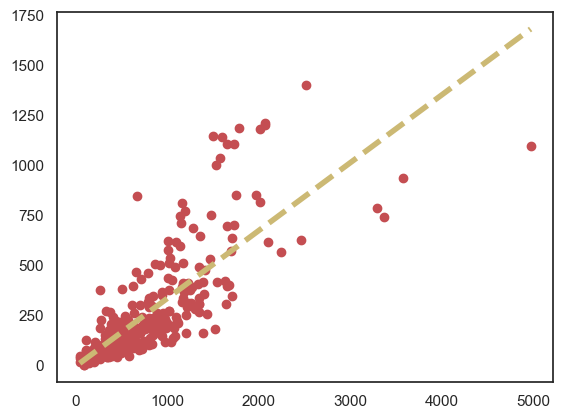

In [39]:
# Dibujamos el diagrama de dispersión
# The linspace funtion generates the grid
# linespace es como un rango, le das el minimo y el máximo y el numero de trozos en los que quieres dividir.
X_new = np.linspace(X_1.min(), X_1.max(), num = 100) # pinta los puntos rojos.

# Predict the corresponding Y-values
Y_new = crimes_fit.predict(X_new)

#Plot the sample
plt.plot(X_1.iloc[:,1], Y, 'ro') # pinta la muestra
# And the regression line = "predicted points"
plt.plot(X_new[:,1], Y_new, "y--", lw = 4)
plt.show()

In [40]:
# Para predecir un valor
# En primer lugar comprobamos si ya existe el valor 160 en nuestro modelo
np.any(crimes.autoTheftPerPop == 800)

False

In [41]:
# Ahora predecimos dicho valor
# Creamos un dataframe para pasarle dos dimensiones al predict
# quiero predecir un valor nuevo, lo metemos en un array para pasarlo como param. porque se pueden predecir varios a la vez
X_new = pd.DataFrame({"constant": [1], "value":[800]})

# una vez especificados los valores, le decimos que lo prediga, a partir de la recta que hemos calculado antes (y = 0.3391x - 4.8237)
# por eso, siempre que hacemos esto, estamos calculando valores de la recta.
# Use the predict method from our model
Y_new = crimes_fit.predict(X_new)
# Look at the predicted values
print(f"El valor que predice nuestro modelo para sysBp =  160 es: {Y_new[0]}")

El valor que predice nuestro modelo para sysBp =  160 es: 266.8052081440665


In [42]:
print(f"El residuo de la primera observación de la tabla es de {crimes_fit.resid[11]}")

El residuo de la primera observación de la tabla es de 608.2011987998081
